In [1]:
import numpy as np
import tifffile as tiff
from PARC import parc
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import umap
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.manifold import TSNE

In [2]:
name = ['Hoechst', '5hmc', '5mc', 'Collagen 1', 'Fibronectin', 'aSMA', 'Pan Cyto', 'Calponin', 'VCAM 1']
sample = ['1L', '7L', '11L', '17L']
ROI = ['R1', 'R2', 'R3', 'R4']
n = 5

In [ ]:
def Pixel(sample, ROI, name, n):

    image = tiff.imread('data/Pixel 2/Dataset/' + sample + '/' + ROI + '/' + sample + ' ' + name + '.tif')

    mask = tiff.imread('data/Pixel 2/Dataset/' + sample + '/' + ROI + '/' + sample + ' ' + name + '_Probabilities_0.tiff')

    # Ensure mask is binary (0 and 1)
    mask = (mask > 0.3).astype(np.uint8)  # Converts to boolean mask

    # Overlay the mask (red overlay)
    overlay = np.dstack([image, image, image])  # Convert grayscale to RGB
    overlay[..., 0] = np.where(mask == 1, 255, overlay[..., 0])  # Red channel

    overlapping_intensities = image * mask

    matrix = overlapping_intensities

    # Compute the new dimensions rounded up to the nearest multiple of 3
    new_rows = int(np.ceil(matrix.shape[0] / n) * n)
    new_cols = int(np.ceil(matrix.shape[1] / n) * n)

    # Pad the matrix with the edge values to match the new size
    padded_matrix = np.pad(matrix, 
                            ((0, new_rows - matrix.shape[0]), (0, new_cols - matrix.shape[1])), 
                            mode='edge')

    # Reshape into 3x3 patches
    patches = padded_matrix.reshape(new_rows // n, n, new_cols // n, n)

    # Compute the mean over the 3x3 patches
    averaged_matrix = patches.mean(axis=(1, 3))

    # pd.DataFrame(averaged_matrix)

    # column_vector = [item for sublist in overlapping_intensities for item in sublist]
    column_vector = averaged_matrix.reshape(-1,1)
    # print(len(column_vector))
    
    flatten = pd.DataFrame(column_vector, columns = [name])
    return flatten

In [4]:
WT_R1 = pd.DataFrame()
for k in range(len(name)):
    WT_R1 = pd.concat([WT_R1, Pixel(sample[0], ROI[0], name[k], n)], axis=1)

WT_R2 = pd.DataFrame()
for k in range(len(name)):
    WT_R2 = pd.concat([WT_R2, Pixel(sample[0], ROI[1], name[k], n)], axis=1)

WT_R3 = pd.DataFrame()
for k in range(len(name)):
    WT_R3 = pd.concat([WT_R3, Pixel(sample[0], ROI[2], name[k], n)], axis=1)

WT_R4 = pd.DataFrame()
for k in range(len(name)):
    WT_R4 = pd.concat([WT_R4, Pixel(sample[0], ROI[3], name[k], n)], axis=1)

WTHF_R1 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R1 = pd.concat([WTHF_R1, Pixel(sample[1], ROI[0], name[k], n)], axis=1)

WTHF_R2 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R2 = pd.concat([WTHF_R2, Pixel(sample[1], ROI[1], name[k], n)], axis=1)

WTHF_R3 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R3 = pd.concat([WTHF_R3, Pixel(sample[1], ROI[2], name[k], n)], axis=1)

FB_R1 = pd.DataFrame()
for k in range(len(name)):
    FB_R1 = pd.concat([FB_R1, Pixel(sample[2], ROI[0], name[k], n)], axis=1)

FB_R2 = pd.DataFrame()
for k in range(len(name)):
    FB_R2 = pd.concat([FB_R2, Pixel(sample[2], ROI[1], name[k], n)], axis=1)

FB_R3 = pd.DataFrame()
for k in range(len(name)):
    FB_R3 = pd.concat([FB_R3, Pixel(sample[2], ROI[2], name[k], n)], axis=1)

FB_R4 = pd.DataFrame()
for k in range(len(name)):
    FB_R4 = pd.concat([FB_R4, Pixel(sample[2], ROI[3], name[k], n)], axis=1)

FBHF_R1 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R1 = pd.concat([FBHF_R1, Pixel(sample[3], ROI[0], name[k], n)], axis=1)

FBHF_R2 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R2 = pd.concat([FBHF_R2, Pixel(sample[3], ROI[1], name[k], n)], axis=1)

FBHF_R3 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R3 = pd.concat([FBHF_R3, Pixel(sample[3], ROI[2], name[k], n)], axis=1)

FBHF_R4 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R4 = pd.concat([FBHF_R4, Pixel(sample[3], ROI[3], name[k], n)], axis=1)

In [5]:
for i in range(len(sample)):
    if sample[i] == '1L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS1 = pd.concat([DS, oneROI])
            DS = pixelDS1
    if sample[i] == '7L':
        DS = pd.DataFrame()
        for j in range(len(ROI)-1):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS2 = pd.concat([DS, oneROI])
            DS = pixelDS2
    if sample[i] == '11L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS3 = pd.concat([DS, oneROI])
            DS = pixelDS3
    if sample[i] == '17L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS4 = pd.concat([DS, oneROI])
            DS = pixelDS4

In [6]:
def whole(df):
    fig,ax = plt.subplots(9,9, figsize = (20,20))
    m = np.zeros((9,9))
    df_normalized = (df - df.min()) / (df.max() - df.min())
    for i in range(9):
        for j in range(9):
            x = df_normalized[name[i]]
            y = df_normalized[name[j]]
            m[i,j], c = np.polyfit(x,y,1)
            # polynomial = np.poly1d(coefficients)
            y_predicted = m[i,j] * x + c
            ax[i,j].scatter(x, y, s=1, alpha=0.5, c = 'purple')
            if m[i,j] >= 0.7:
                ax[i,j].plot(x, y_predicted, color = 'red')
            ax[i,j].set_xlabel(name[i], fontsize = 17)
            ax[i,j].set_ylabel(name[j], fontsize = 17)
            ax[i,j].set_title(name[j] + ' vs. ' + name[i], fontsize = 13)
    fig = plt.tight_layout()
    return m


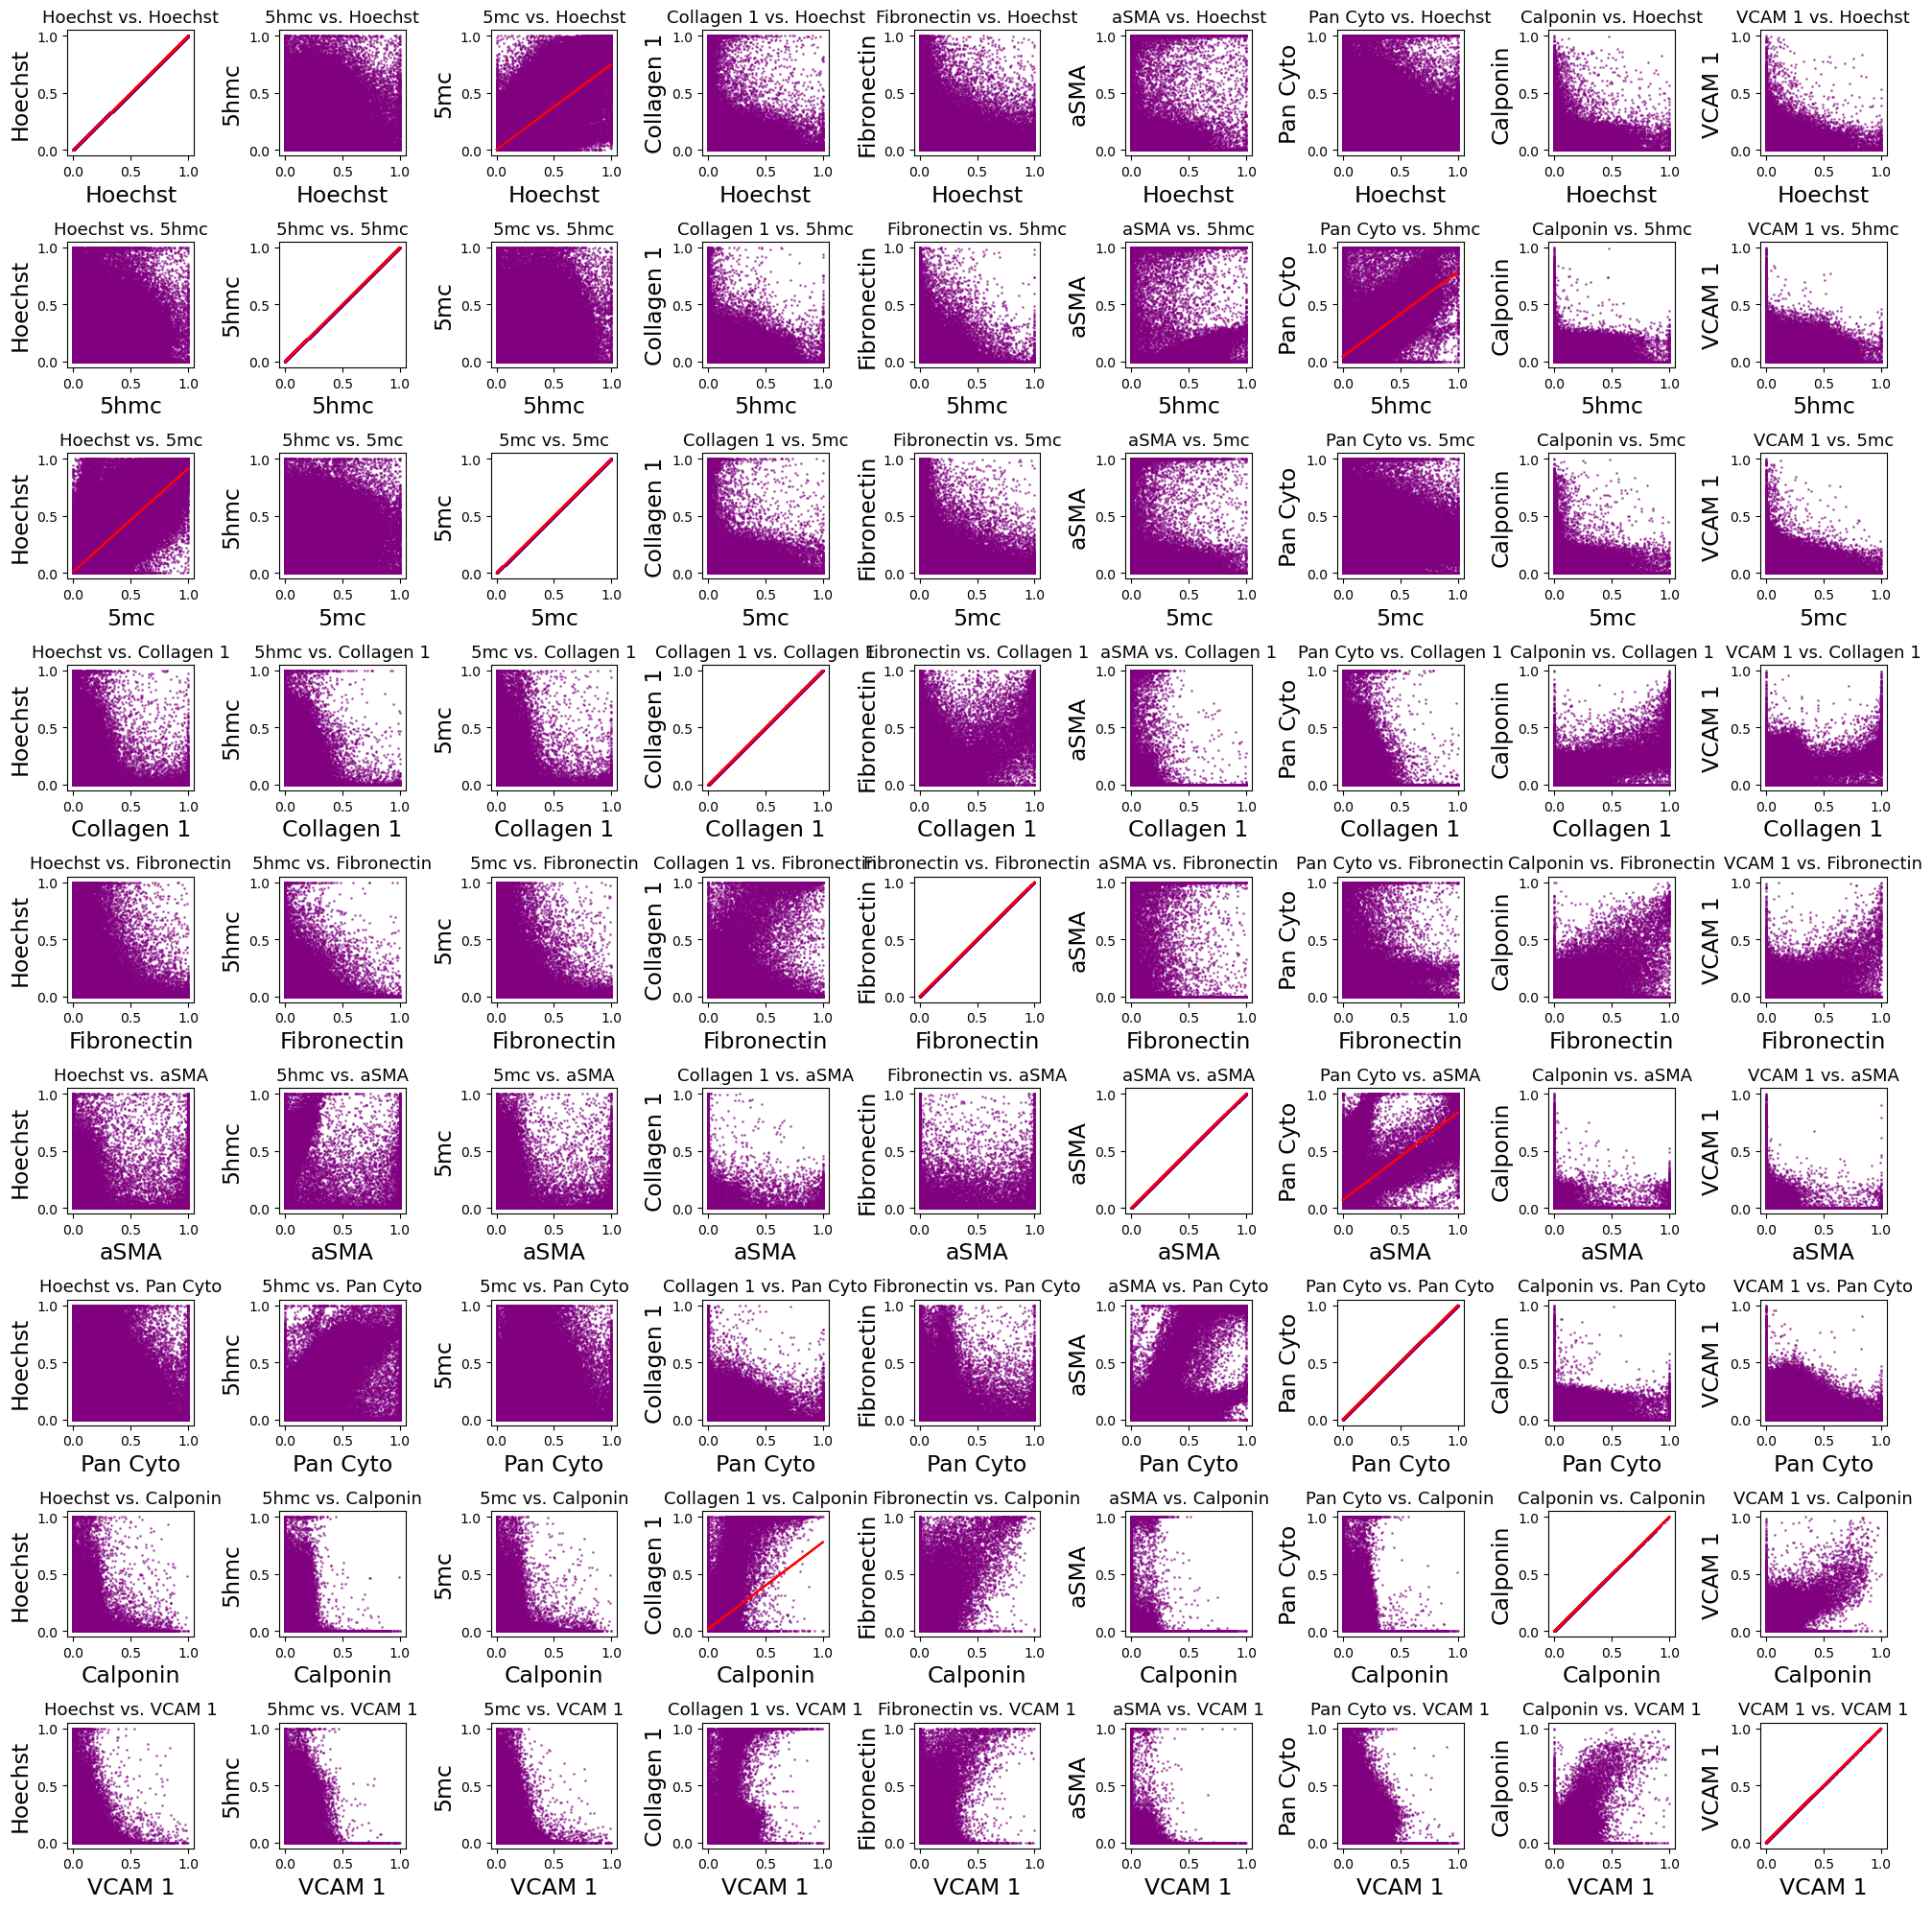

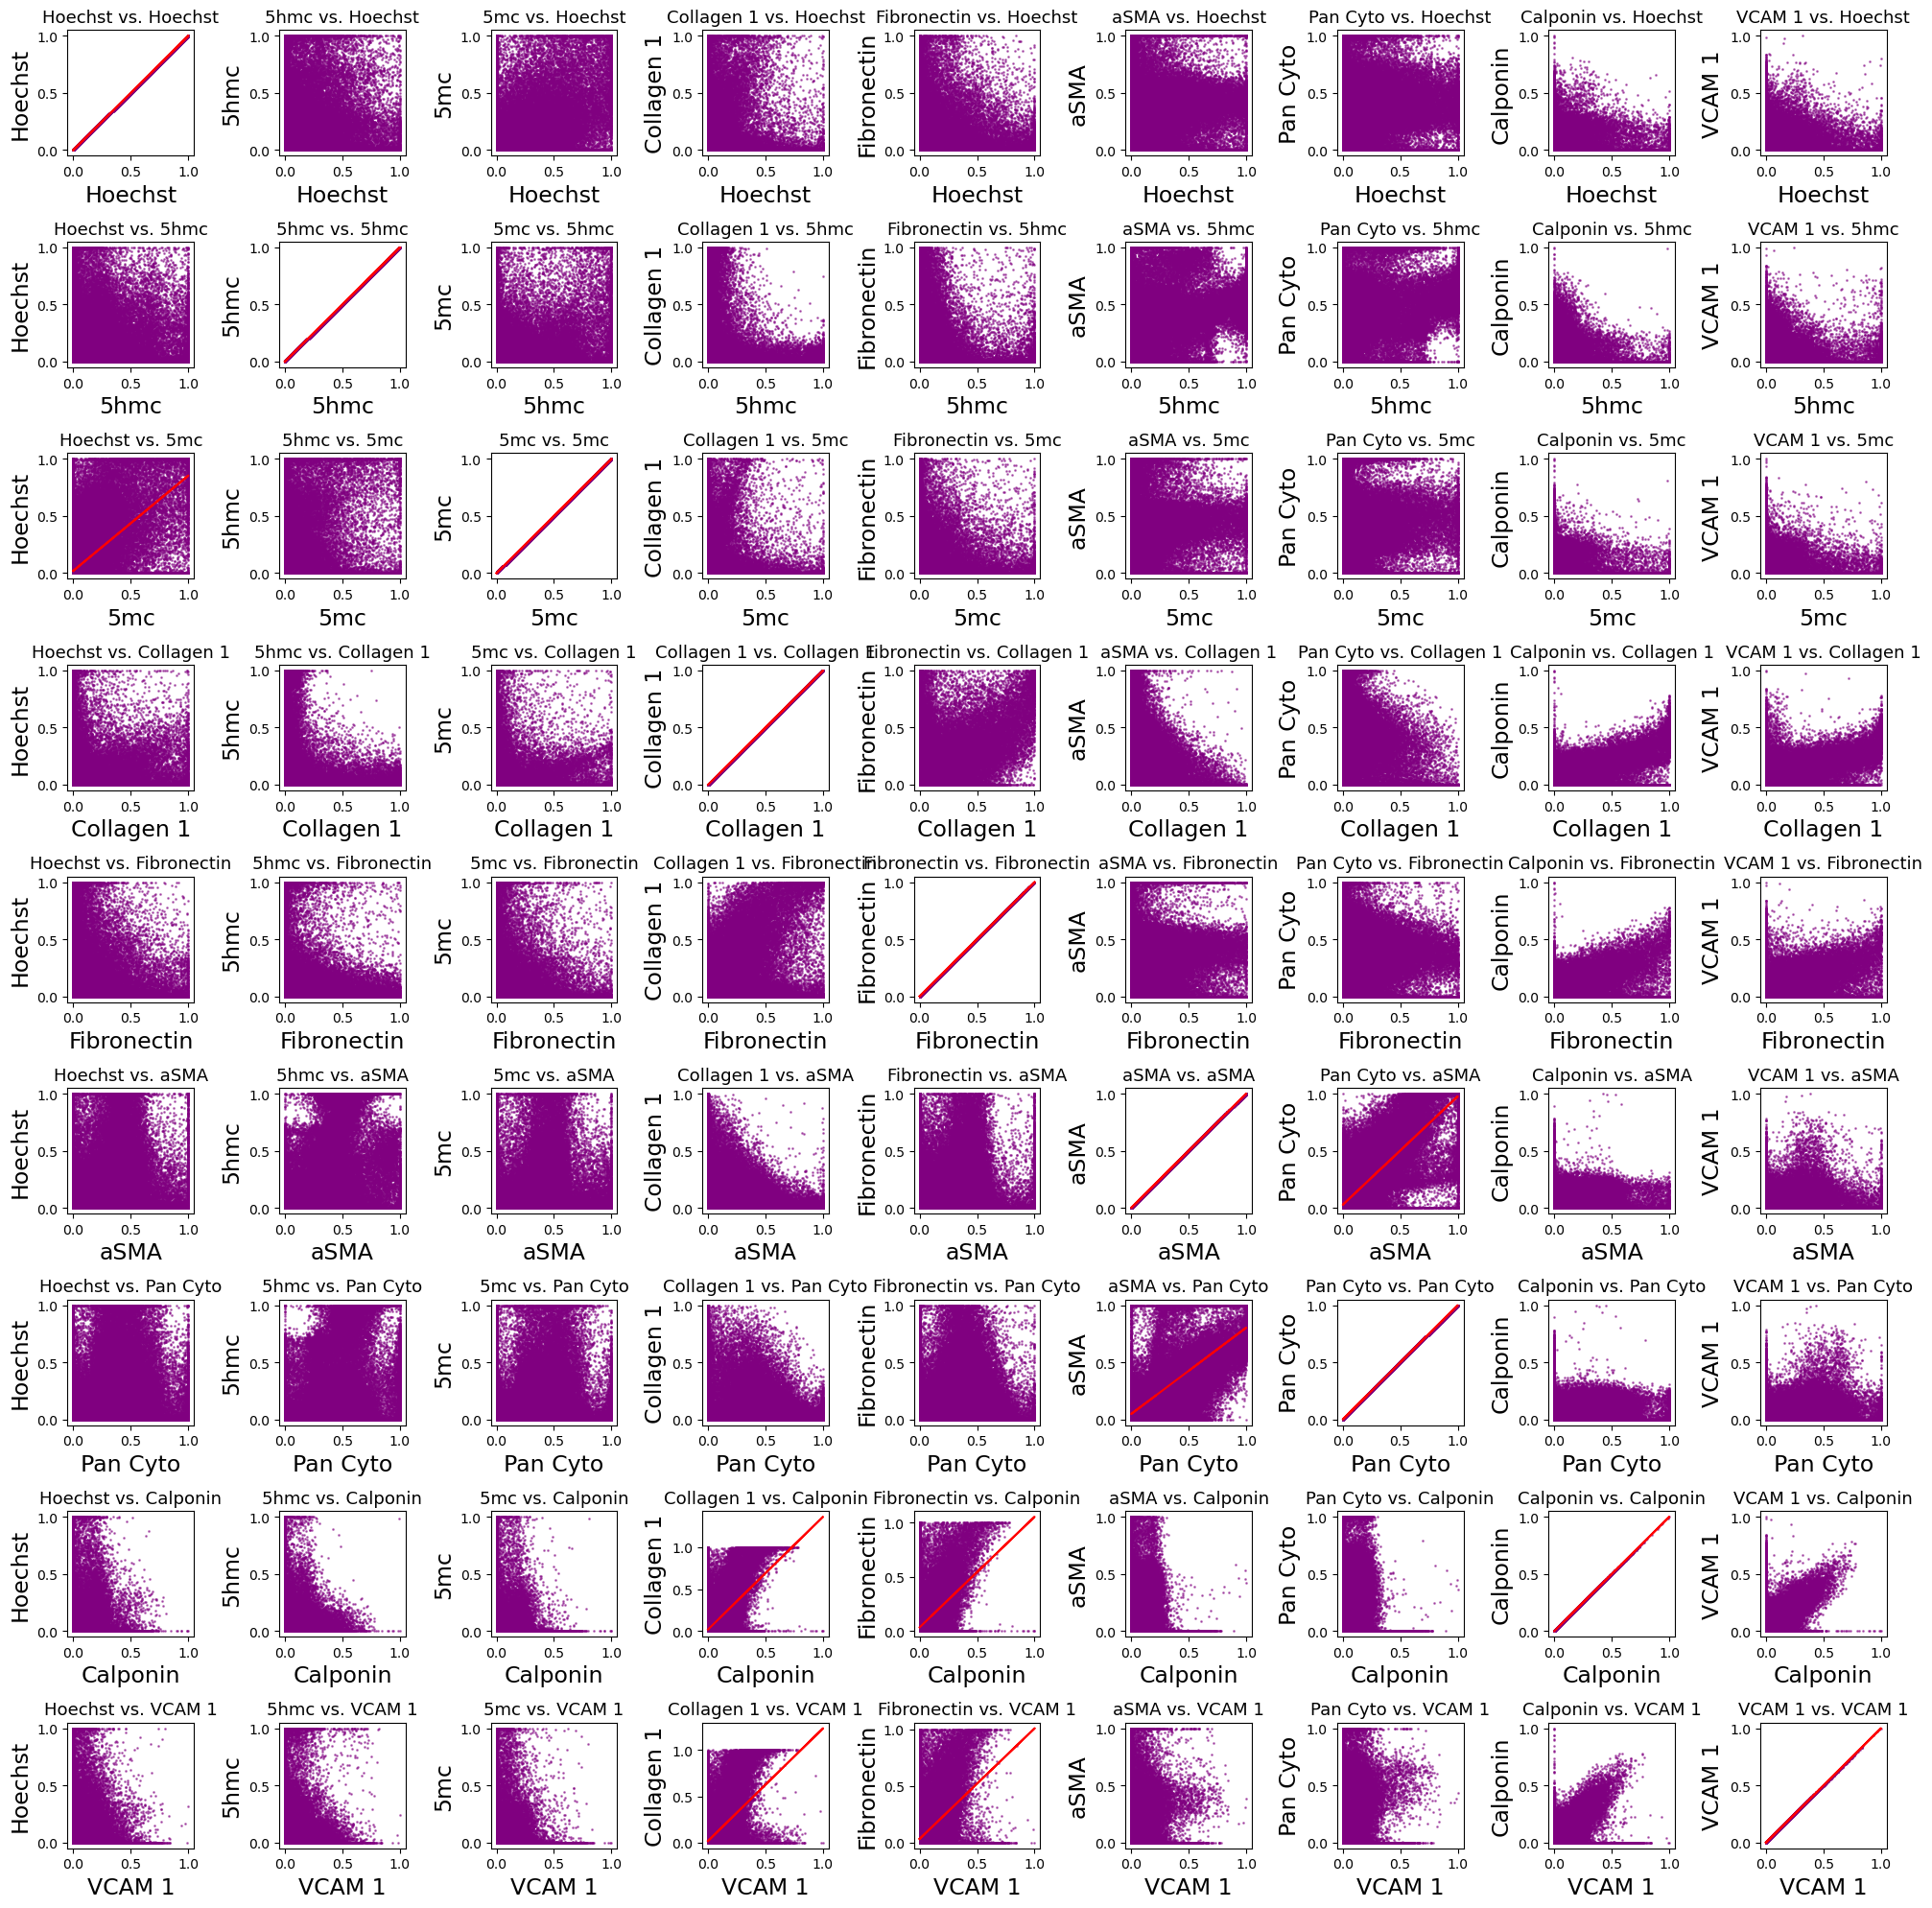

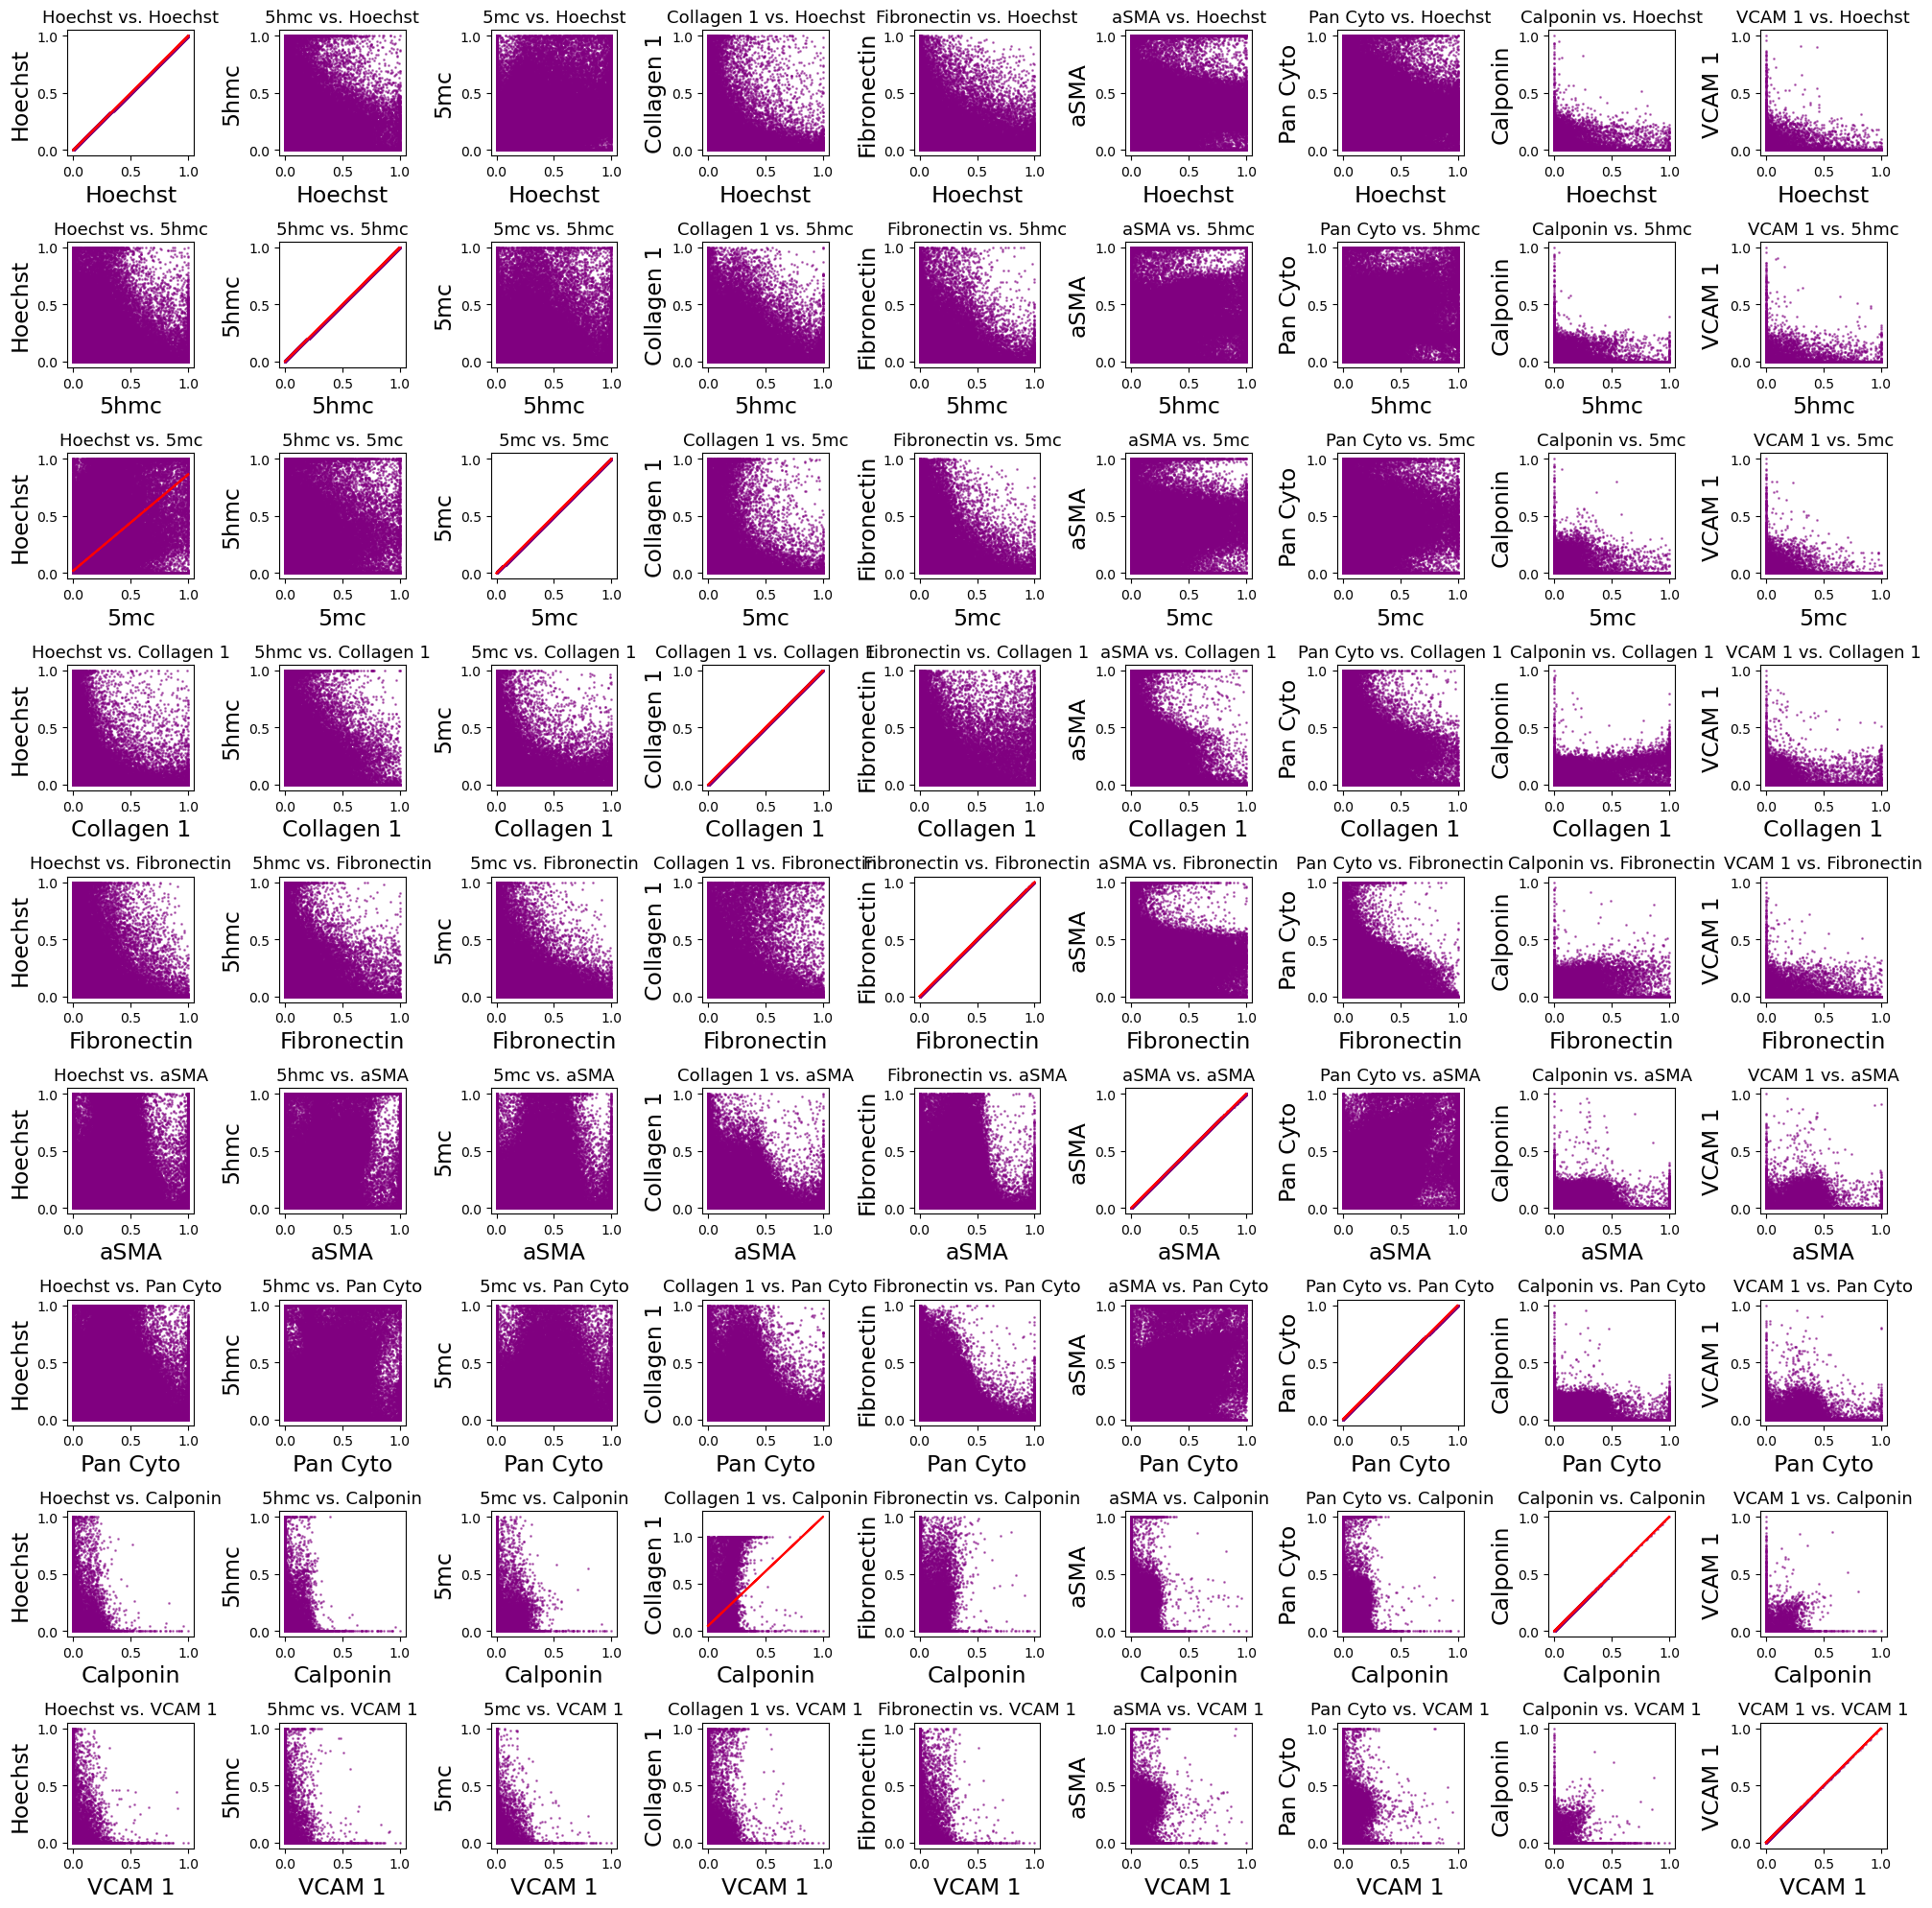

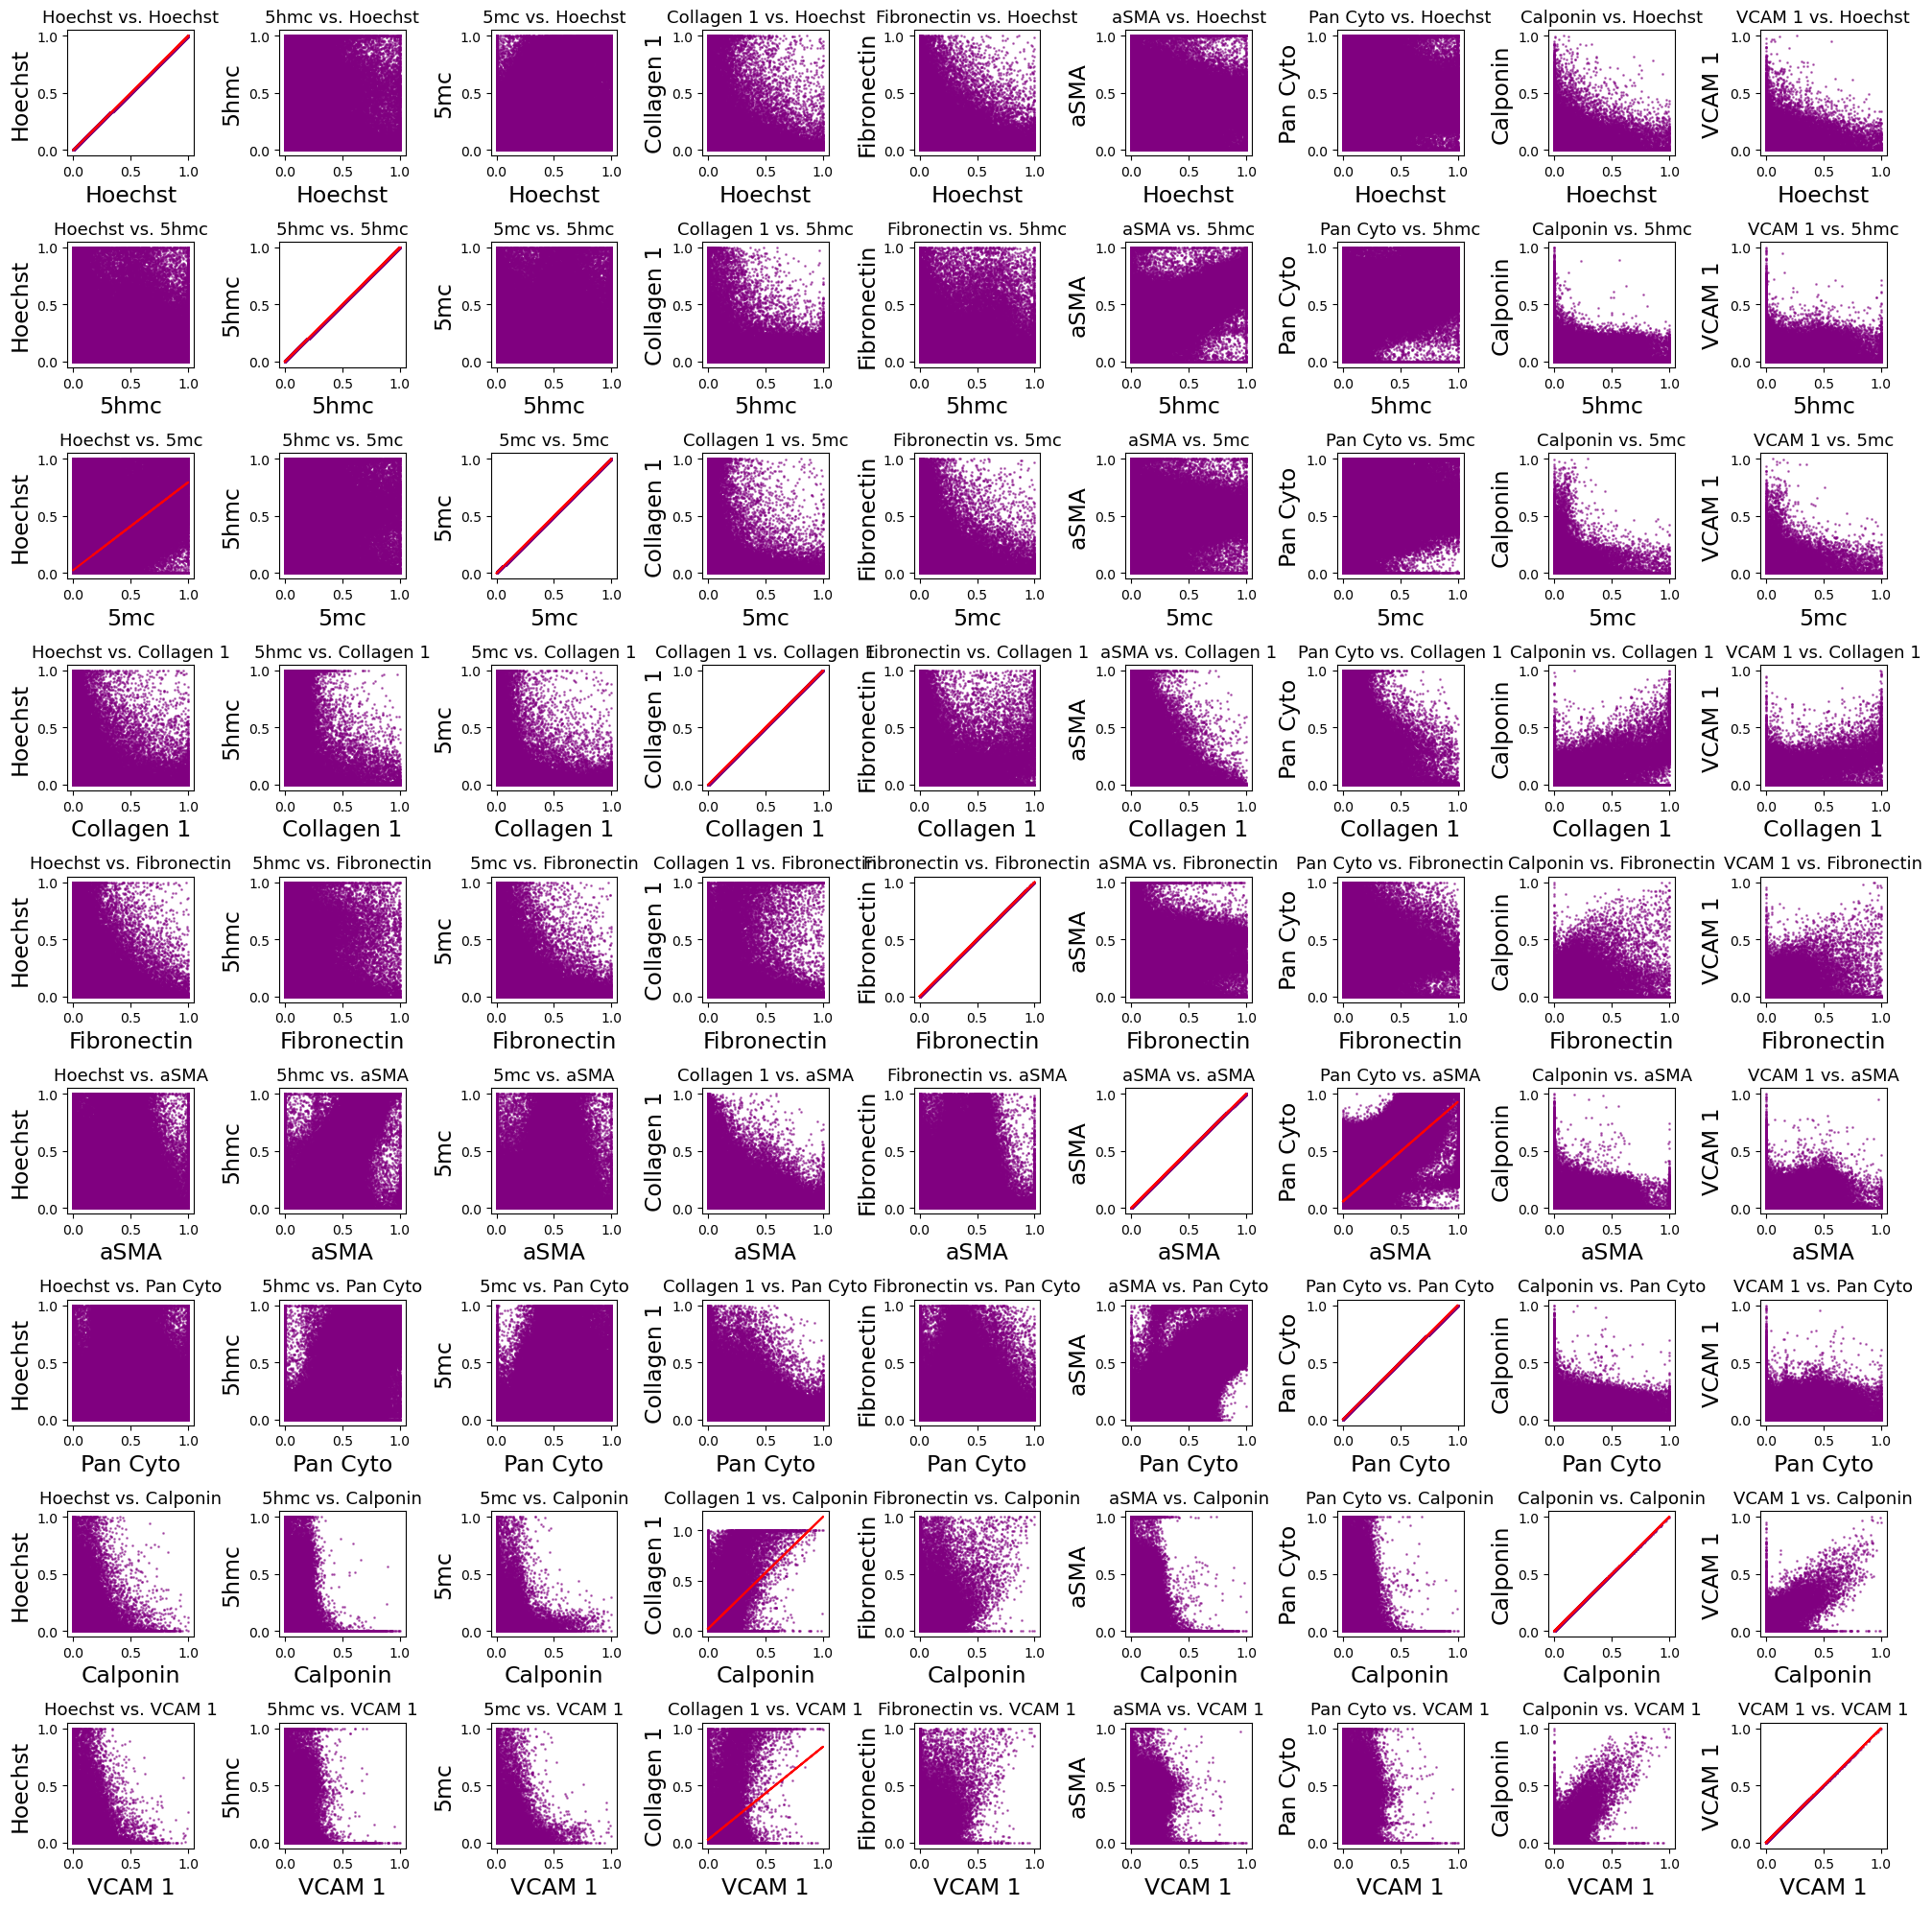

In [7]:
m1 = whole(pixelDS1)
m2 = whole(pixelDS2)
m3 = whole(pixelDS3)
m4 = whole(pixelDS4)

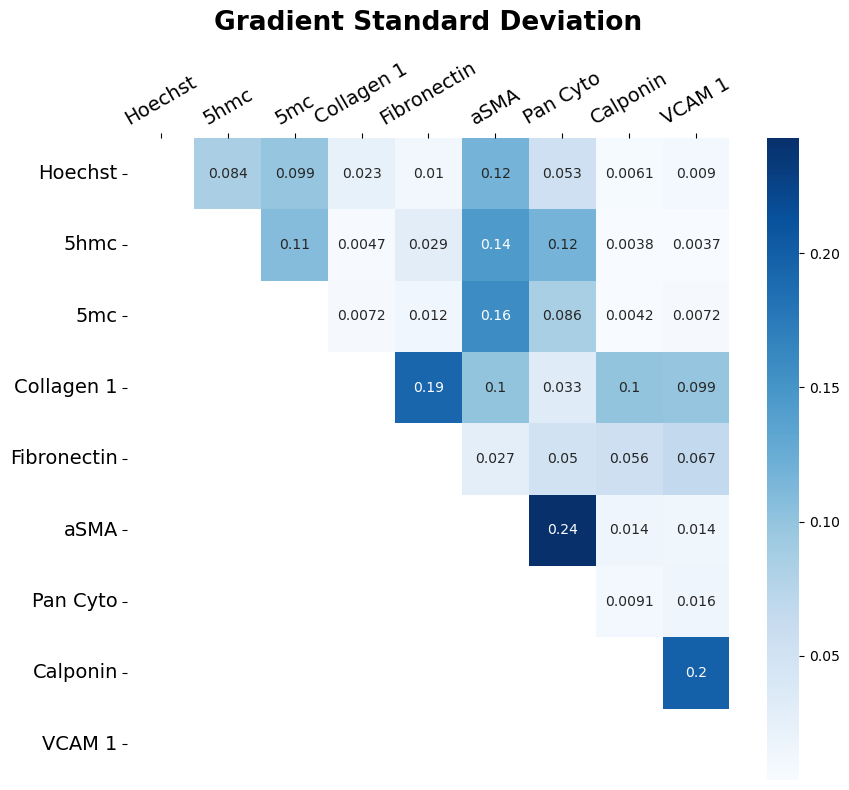

In [8]:
std = np.zeros((9,9))
for i in range(9):
    for j in range(9):
        categories = ['1L', '7L', '11L', '17L']
        m = [abs(m1[i,j]),abs(m2[i,j]),abs(m3[i,j]),abs(m4[i,j])]
        std[i,j] = np.std(m)

plt.figure(figsize=(9, 8))

mask = np.tril(np.ones_like(std, dtype=bool))
g = sns.heatmap(std, annot=True, cmap="Blues", mask=mask)
g.tick_params(axis='x', reset=True, bottom = False, labeltop=True, labelbottom=False)
# g.tick_params(axis='y', reset=True, left = False, labelright=True, labelleft=False)
g.set_xticklabels(name, fontsize= 14,rotation=0)
g.set_yticklabels(name, fontsize= 14, rotation=0)

plt.xticks(rotation=30)
plt.title('Gradient Standard Deviation', pad=20, fontweight ="bold", fontsize = 19)
fig = plt.tight_layout()